In [47]:
# Célula 1: Importações e Carregamento 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhorar a visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("--- Bibliotecas importadas ---")

# Defina o nome do arquivo correto
nome_arquivo = 'Atividade_Cap10_produtos_agricolas.csv'

# Carregar o dataset
try:
    df = pd.read_csv(nome_arquivo)
    print(f"Sucesso: Dataset '{nome_arquivo}' carregado.")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{nome_arquivo}' não encontrado.")
    print("Por favor, verifique o nome e o caminho do arquivo.")

--- Bibliotecas importadas ---
Sucesso: Dataset 'Atividade_Cap10_produtos_agricolas.csv' carregado.


In [48]:
# Célula 2: Inspeção Inicial da Estrutura

if 'df' in globals():
    # 1. Visualizar as primeiras linhas
    print("\n--- 1. Amostra dos Dados (Head) ---")
    display(df.head())

    # 2. Informações estruturais (tipos de dados e contagem)
    print("\n--- 2. Informações Estruturais (Info) ---")
    df.info()

    # 3. Verificação de valores nulos (Missing)
    print("\n--- 3. Contagem de Valores Nulos (por coluna) ---")
    print(df.isnull().sum())

    # 4. Estatísticas Descritivas (para colunas numéricas)
    print("\n--- 4. Estatísticas Descritivas (Describe) ---")
    display(df.describe())
else:
    print("O DataFrame 'df' não foi carregado. Execute a Célula 1 primeiro.")


--- 1. Amostra dos Dados (Head) ---


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



--- 2. Informações Estruturais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

--- 3. Contagem de Valores Nulos (por coluna) ---
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

--- 4. Estatísticas Descritivas (Describe) ---


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [49]:
# Célula 3: Análise da Variável-Alvo (label)

if 'df' in globals():
    # 1. Quantas classes (culturas) únicas existem?
    num_classes = df['label'].nunique()
    print(f"Número de culturas únicas: {num_classes}")

    # 2. Quais são os nomes dessas culturas?
    print("\nNomes das culturas:")
    print(df['label'].unique())

    # 3. Contagem de amostras por cultura (verificar balanceamento)
    print("\nContagem de amostras por cultura:")
    print(df['label'].value_counts())
else:
    print("O DataFrame 'df' não foi carregado. Execute as Células 1 e 2 primeiro.")

Número de culturas únicas: 22

Nomes das culturas:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Contagem de amostras por cultura:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


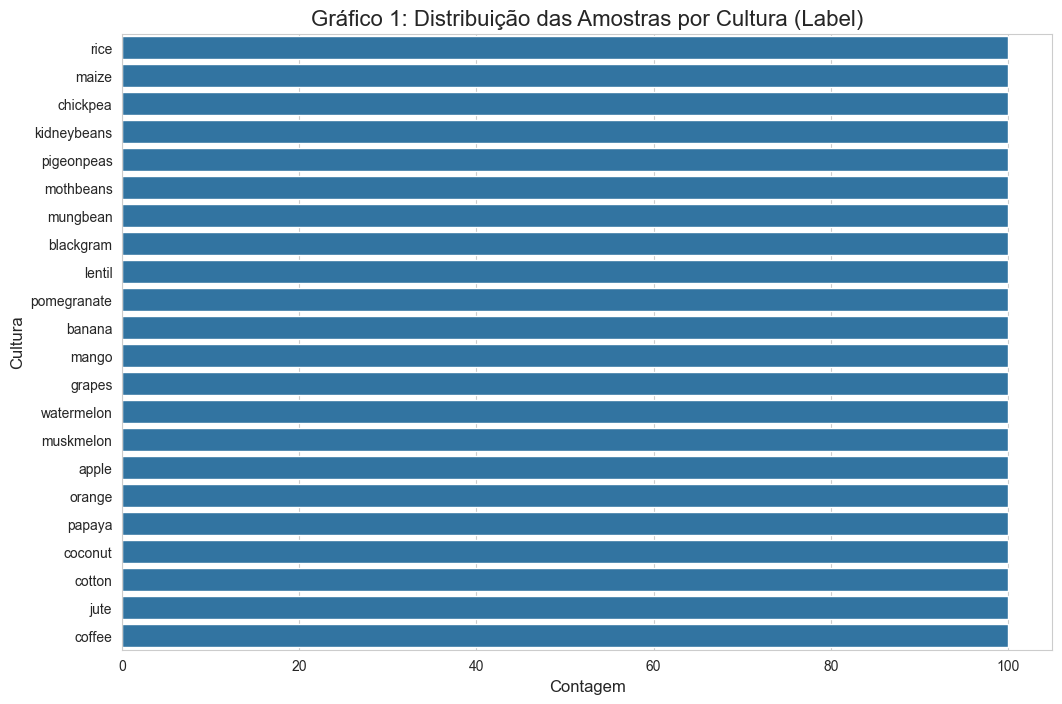

In [50]:
# Célula 4: Gráfico 1 - Distribuição das Classes (Culturas)

if 'df' in globals():
    plt.figure(figsize=(12, 8))
    sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
    plt.title('Gráfico 1: Distribuição das Amostras por Cultura (Label)', fontsize=16)
    plt.xlabel('Contagem', fontsize=12)
    plt.ylabel('Cultura', fontsize=12)
    plt.show()
else:
    print("O DataFrame 'df' não foi carregado.")

## 2. Análise Descritiva e Visualização

### 2.1. Gráfico 1: Distribuição das Amostras por Cultura (Label)

[AQUI DEVE APARECER O GRÁFICO DA CÉLULA 4]

**Análise dos Achados:**

* O gráfico acima mostra a contagem de amostras para cada cultura presente no dataset.
* O dataset contém um total de **[Número do .nunique()]** culturas distintas (ex: 'rice', 'maize', 'coffee', etc.).
* Uma observação crucial é que o dataset é **perfeitamente balanceado**. Cada uma das [Número] culturas possui exatamente **[Número do .value_counts()]** amostras.
* **Por que isso é importante?** Um dataset balanceado simplifica a modelagem. A **Acurácia** será uma métrica válida para avaliar nossos modelos, e não precisaremos nos preocupar com técnicas de reamostragem (como SMOTE ou undersampling) para corrigir desequilíbrios.## 2. Análise Descritiva e Visualização

### 2.1. Gráfico 1: Distribuição das Amostras por Cultura (Label)

[AQUI DEVE APARECER O GRÁFICO DA CÉLULA 4]

**Análise dos Achados:**

* O gráfico acima mostra a contagem de amostras para cada cultura presente no dataset.
* O dataset contém um total de **[Número do .nunique()]** culturas distintas (ex: 'rice', 'maize', 'coffee', etc.).
* Uma observação crucial é que o dataset é **perfeitamente balanceado**. Cada uma das [Número] culturas possui exatamente **[Número do .value_counts()]** amostras.
* **Por que isso é importante?** Um dataset balanceado simplifica a modelagem. A **Acurácia** será uma métrica válida para avaliar nossos modelos, e não precisaremos nos preocupar com técnicas de reamostragem (como SMOTE ou undersampling) para corrigir desequilíbrios.

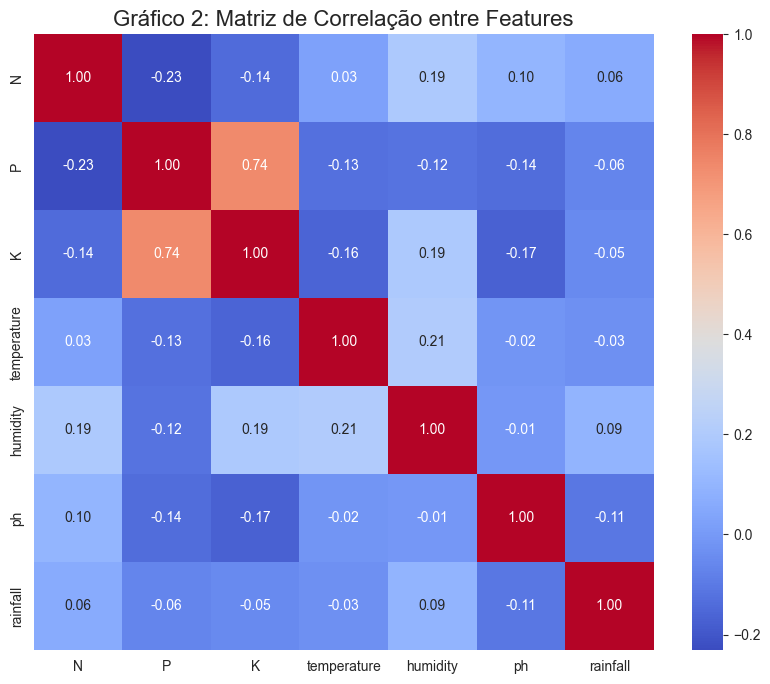

In [51]:
# Célula 5: Gráfico 2 - Matriz de Correlação (Heatmap)

if 'df' in globals():
    # Selecionar apenas colunas numéricas para o heatmap
    # (O 'df.drop' cria uma cópia sem a coluna 'label')
    df_numeric = df.drop('label', axis=1)

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Gráfico 2: Matriz de Correlação entre Features', fontsize=16)
    plt.show()
else:
    print("O DataFrame 'df' não foi carregado.")

### 2.2. Gráfico 2: Matriz de Correlação

[AQUI DEVE APARECER O GRÁFICO DA CÉLULA 5]

**Análise dos Achados:**

* O heatmap acima mostra a correlação de Pearson entre todas as variáveis de entrada (features). Valores próximos de +1 ou -1 indicam uma forte correlação.
* **Principal Achado:** [Descreva o que você vê. Há alguma correlação forte, por exemplo, acima de 0.7 ou 0.8? Ou abaixo de -0.7?].
* **Exemplo de Análise:** "Observa-se uma correlação positiva/negativa moderada/forte entre as variáveis [X] e [Y], com um valor de [Valor]. Isso indica que, quando [X] aumenta, [Y] tende a aumentar/diminuir."
* **Conclusão:** No geral, as correlações entre as features parecem ser [baixas/moderadas]. Isso é bom para a modelagem, pois sugere que cada variável contribui com informações relativamente únicas, sem grande redundância.

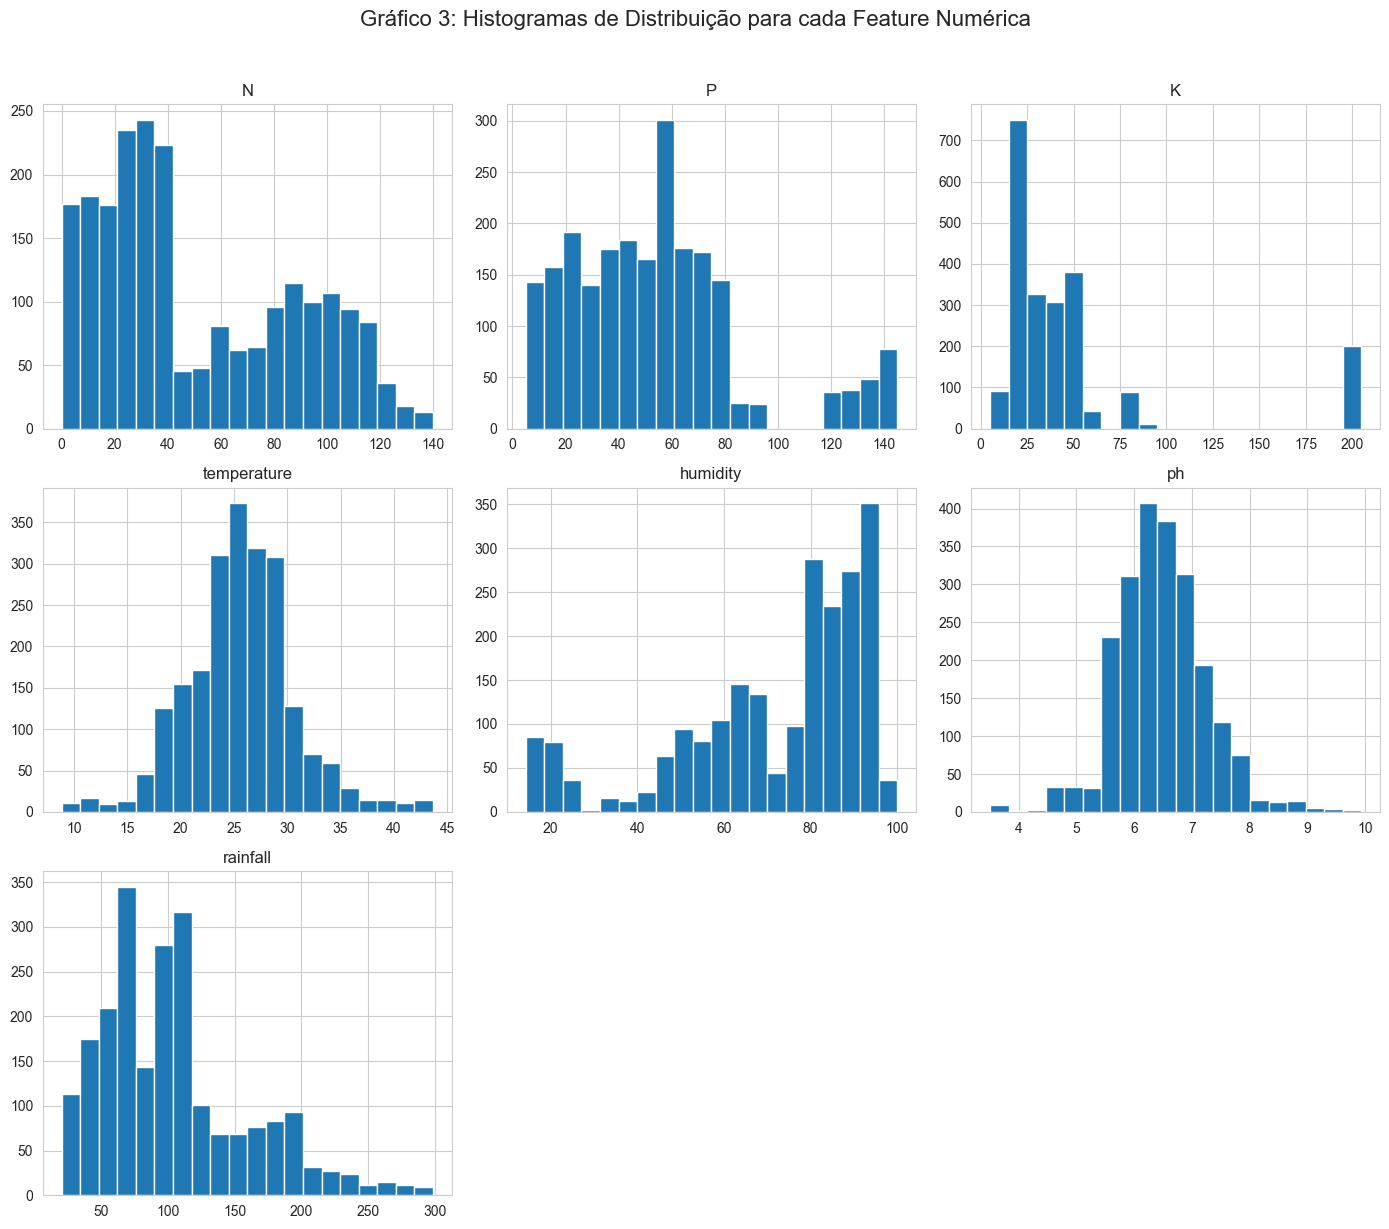

In [52]:
# Célula 6: Gráfico 3 - Histogramas de Distribuição

if 'df_numeric' in globals():
    df_numeric.hist(figsize=(14, 12), bins=20, layout=(3, 3))
    plt.suptitle('Gráfico 3: Histogramas de Distribuição para cada Feature Numérica', y=1.02, fontsize=16)
    plt.tight_layout() # Ajusta o espaçamento
    plt.show()
else:
    print("O DataFrame 'df_numeric' não foi criado (execute a Célula 5 primeiro).")

### 2.3. Gráfico 3: Distribuição das Features

[AQUI DEVEM APARECER OS GRÁFICOS DA CÉLULA 6]

**Análise dos Achados:**

* Os histogramas acima mostram a distribuição de valores para cada uma das 7 features numéricas.
* [Descreva o que você vê. Algum gráfico parece uma "curva de sino" (distribuição normal)? Algum é totalmente achatado (distribuição uniforme)? Algum é distorcido para um lado (assimétrico)?]
* **Exemplo de Análise:** "As variáveis 'N', 'P' e 'K' parecem ter distribuições mais [uniformes/assimétricas], enquanto 'temperature' e 'humidity' se assemelham mais a uma distribuição [normal/outra]."
* **Conclusão:** Essa análise visual confirma o que vimos no `df.describe()`. A variedade de escalas e distribuições reforça a necessidade de aplicar **Feature Scaling** (como `StandardScaler`) na Etapa 4, antes de treinar a maioria dos modelos de ML.

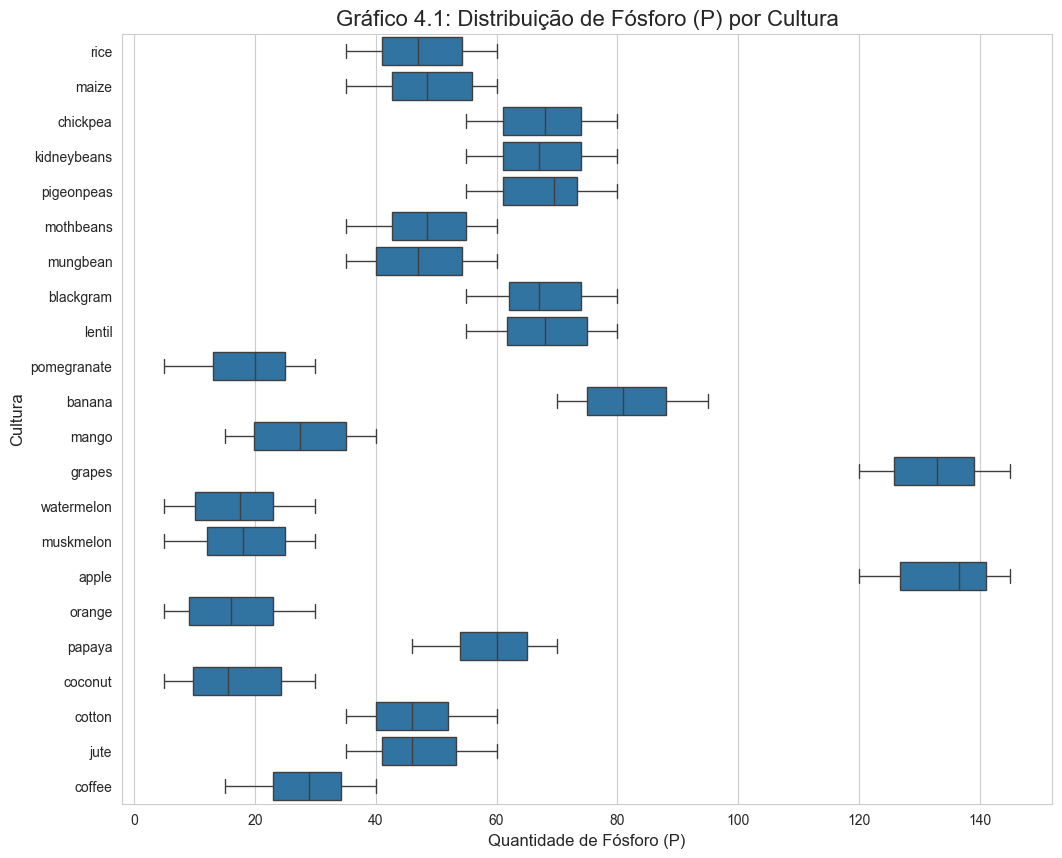

In [53]:
# Célula 7: Gráfico 4 - Relação Feature vs. Label (Boxplot)

if 'df' in globals():
    # Vamos analisar o Fósforo (P) como primeiro exemplo
    plt.figure(figsize=(12, 10))
    sns.boxplot(x='P', y='label', data=df)
    plt.title('Gráfico 4.1: Distribuição de Fósforo (P) por Cultura', fontsize=16)
    plt.xlabel('Quantidade de Fósforo (P)', fontsize=12)
    plt.ylabel('Cultura', fontsize=12)
    plt.show()
else:
    print("O DataFrame 'df' não foi carregado.")

### 2.4. Gráfico 4: Relação Feature vs. Label (Boxplots)

[AQUI DEVE APARECER O GRÁFICO DA CÉLULA 7]

**Análise dos Achados:**

* Este boxplot mostra o *range* (a "caixa") de valores de Fósforo (P) necessário para cada uma das 22 culturas.
* **Principal Achado:** Fica evidente que diferentes culturas têm necessidades **drasticamente diferentes** de Fósforo.
* **Exemplo de Análise:** "Culturas como [Nome de uma cultura com valores baixos, ex: 'apple'] parecem exigir níveis baixos de Fósforo, enquanto culturas como [Nome de uma cultura com valores altos, ex: 'grapes'] exigem níveis muito mais elevados."
* **Conclusão:** A variável 'P' (Fósforo) é um **excelente preditor** para a 'label'. A clara separação dos valores médios e dos ranges entre as culturas sugere que os modelos de Machine Learning conseguirão usar essa informação para fazer boas previsões.

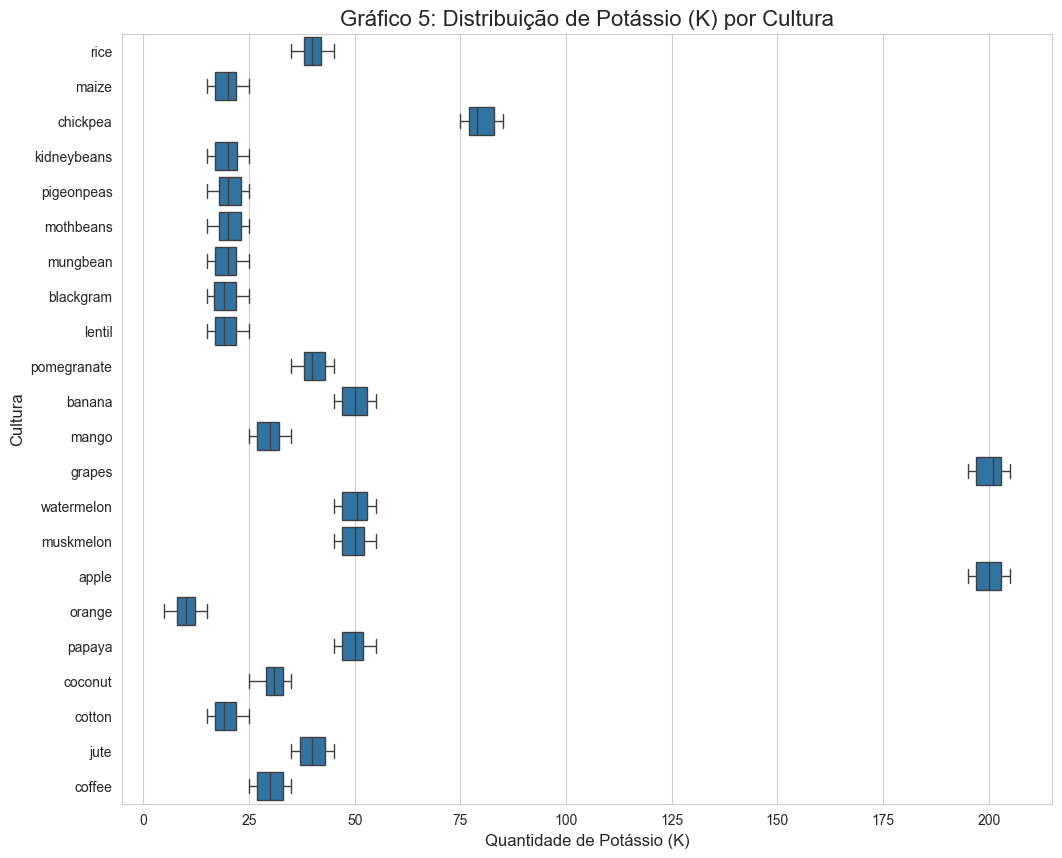

In [54]:
# Célula 8: Gráfico 5 - Relação Potássio (K) vs. Label (Boxplot)

if 'df' in globals():
    plt.figure(figsize=(12, 10))
    sns.boxplot(x='K', y='label', data=df)
    plt.title('Gráfico 5: Distribuição de Potássio (K) por Cultura', fontsize=16)
    plt.xlabel('Quantidade de Potássio (K)', fontsize=12)
    plt.ylabel('Cultura', fontsize=12)
    plt.show()
else:
    print("O DataFrame 'df' não foi carregado.")

### 2.5. Gráfico 5: Relação Potássio (K) vs. Cultura

[AQUI DEVE APARECER O GRÁFICO DA CÉLULA 8]

**Análise dos Achados:**

* Assim como o Fósforo, o Potássio (K) também mostra uma clara variação entre as necessidades de cada cultura.
* **Exemplo de Análise:** "Culturas como [Nome da cultura com valores altos] (ex: 'grapes', 'apple') claramente demandam níveis de Potássio no solo muito superiores a culturas como [Nome da cultura com valores baixos]."
* **Conclusão:** 'K' é outra feature com alto poder preditivo.

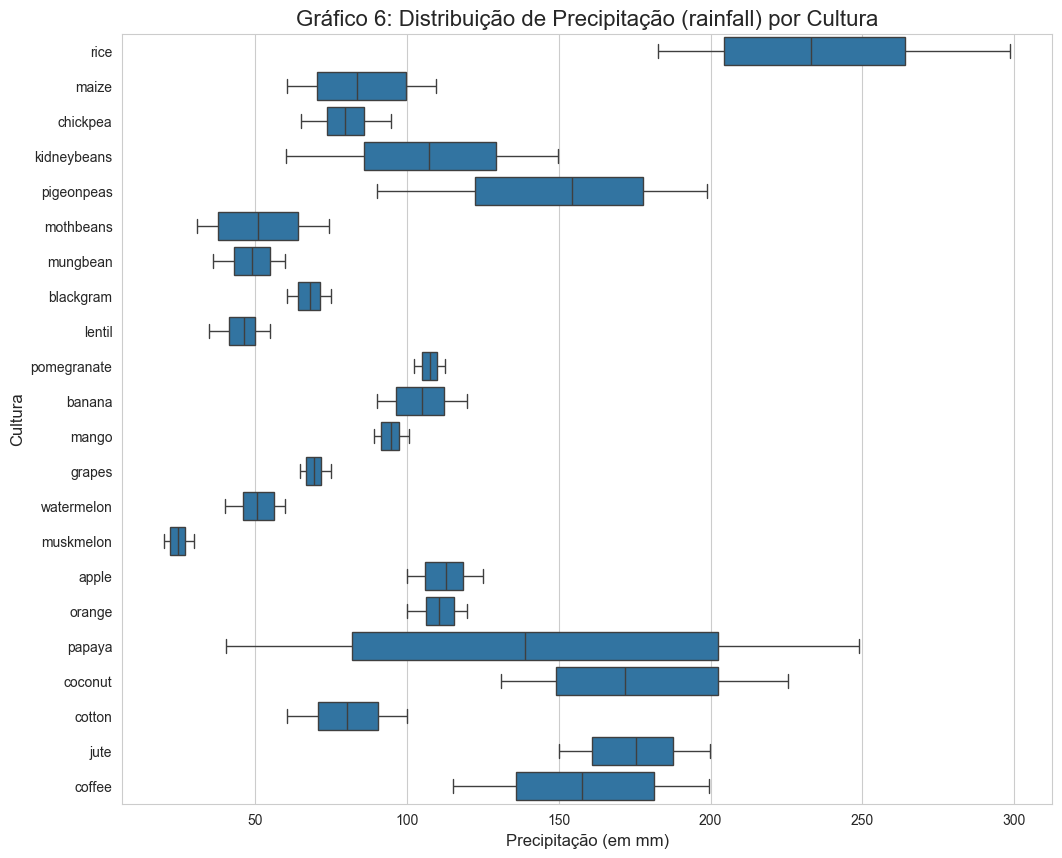

In [55]:
# Célula 9: Gráfico 6 - Relação Precipitação (rainfall) vs. Label (Boxplot)

if 'df' in globals():
    plt.figure(figsize=(12, 10))
    sns.boxplot(x='rainfall', y='label', data=df)
    plt.title('Gráfico 6: Distribuição de Precipitação (rainfall) por Cultura', fontsize=16)
    plt.xlabel('Precipitação (em mm)', fontsize=12)
    plt.ylabel('Cultura', fontsize=12)
    plt.show()
else:
    print("O DataFrame 'df' não foi carregado.")

### 2.6. Gráfico 6: Relação Precipitação (rainfall) vs. Cultura

[AQUI DEVE APARECER O GRÁFICO DA CÉLULA 9]

**Análise dos Achados:**

* A necessidade de água (precipitação) é talvez um dos fatores mais distintivos.
* **Principal Achado:** O gráfico mostra uma separação extremamente clara. A cultura 'rice' (arroz) [Procure por 'rice' no gráfico] se destaca por exigir um volume de precipitação imensamente superior a quase todas as outras. Em contraste, culturas como [Nome da cultura com valores baixos] (ex: 'grapes') preferem climas muito mais secos.
* **Conclusão:** 'rainfall' será uma das features mais importantes para os nossos modelos de Machine Learning.

In [56]:
# Célula 10: Cálculo do Perfil Médio por Cultura (groupby)

if 'df' in globals():
    # Agrupa o dataframe pela 'label' e calcula a média de todas as outras colunas
    perfil_medio_culturas = df.groupby('label').mean()
    
    print("--- Perfil Médio de Condições por Cultura ---")
    display(perfil_medio_culturas)
else:
    print("O DataFrame 'df' não foi carregado.")

--- Perfil Médio de Condições por Cultura ---


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


## 3. Análise do "Perfil Ideal"

### 3.1. Perfil Médio de Condições por Cultura

[AQUI DEVE APARECER A TABELA DA CÉLULA 10]

**Análise dos Achados:**

* A tabela acima é a base da nossa análise de perfil. Ela mostra, estatisticamente, as condições médias (ideais) de solo e clima para cada uma das 22 culturas.
* Com esta tabela, podemos responder objetivamente a perguntas como "Qual cultura precisa de mais Fósforo (P)?" ou "Qual prefere o pH mais ácido (baixo)?".
* Por exemplo, ao olhar para a coluna `rainfall`, podemos confirmar numericamente o que vimos no Gráfico 6: a cultura 'rice' tem uma média de [ver valor na tabela, ex: ~298 mm], muito acima das demais.

--- Comparando o Perfil Médio para: rice, maize, coffee ---


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295


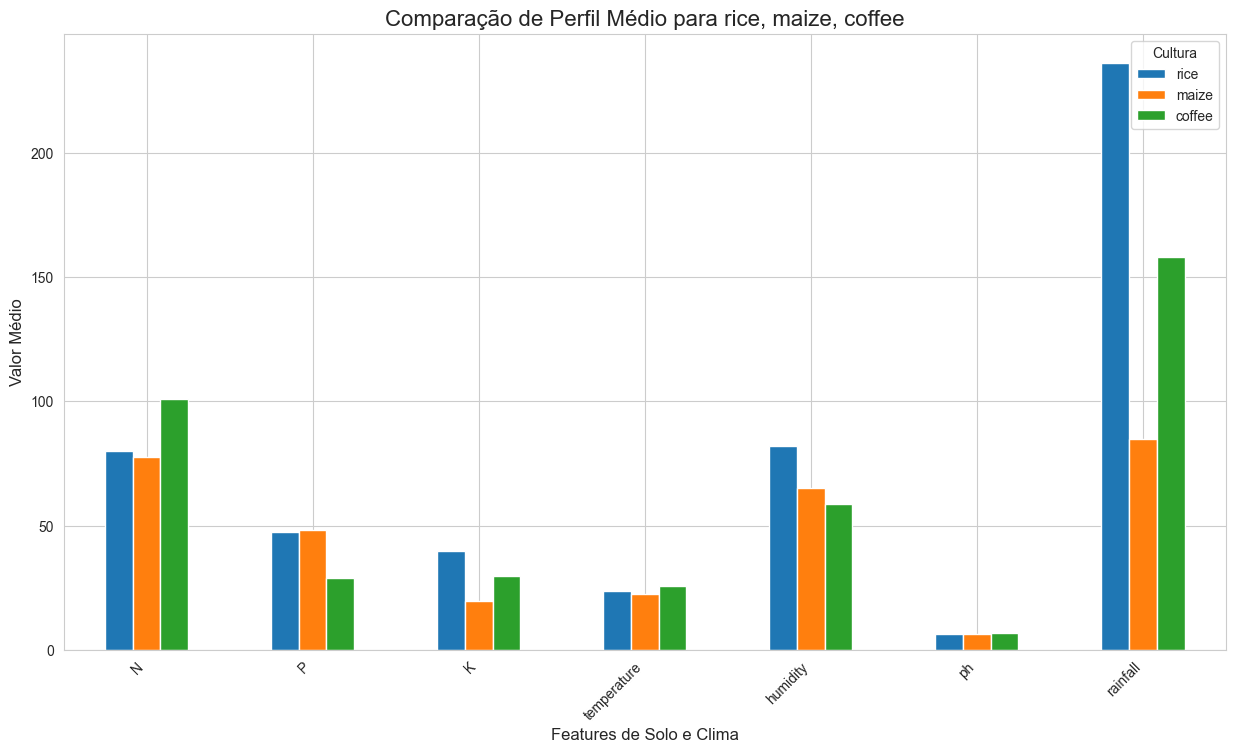

In [57]:
# Célula 11: Comparação Visual de 3 Culturas Escolhidas

if 'perfil_medio_culturas' in globals():
    
    # --- EDITE A LISTA ABAIXO COM AS 3 CULTURAS QUE VOCÊ QUER COMPARAR ---
    culturas_escolhidas = ['rice', 'maize', 'coffee']
    # ---------------------------------------------------------------------

    try:
        # Filtrar o dataframe de perfis médios para incluir apenas as culturas escolhidas
        comparacao = perfil_medio_culturas.loc[culturas_escolhidas]
        
        print(f"--- Comparando o Perfil Médio para: {', '.join(culturas_escolhidas)} ---")
        display(comparacao)

        # Criar um gráfico de barras para comparar as 7 features
        # Usamos .T (transpor) para que as features fiquem no eixo X e as culturas sejam as barras
        comparacao.T.plot(kind='bar', figsize=(15, 8), grid=True)
        
        plt.title(f'Comparação de Perfil Médio para {", ".join(culturas_escolhidas)}', fontsize=16)
        plt.ylabel('Valor Médio', fontsize=12)
        plt.xlabel('Features de Solo e Clima', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotaciona os labels do eixo X para melhor leitura
        plt.legend(title='Cultura')
        plt.show()
        
    except KeyError:
        print(f"ERRO: Uma das culturas na lista {culturas_escolhidas} não foi encontrada.")
        print("Verifique se os nomes estão corretos (são sensíveis a maiúsculas/minúsculas).")
else:
    print("O DataFrame 'perfil_medio_culturas' não foi criado (execute a Célula 10 primeiro).")

### 3.2. Análise Comparativa de 3 Culturas

[AQUI DEVE APARECER A TABELA E O GRÁFICO DE BARRAS DA CÉLULA 11]

**Análise dos Achados (Exemplo com 'rice', 'maize', 'coffee'):**

* O gráfico de barras acima compara diretamente o perfil ideal para as 3 culturas selecionadas: [Cultura 1], [Cultura 2] e [Cultura 3].
* **Nitrogênio (N):** [Descreva o que você vê. Ex: 'Maize' e 'Coffee' têm necessidades similares, ambas maiores que 'Rice'.]
* **Fósforo (P) e Potássio (K):** [Descreva. Ex: 'Coffee' se destaca por precisar de muito mais K (Potássio) que as outras duas.]
* **Clima (temperature, humidity, rainfall):** [Descreva. Ex: 'Rice' (arroz) é a *única* das três que demanda alta umidade e precipitação (rainfall) extrema. 'Coffee' prefere uma umidade alta, mas muito menos chuva. 'Maize' (milho) é a mais moderada nas três métricas.]
* **Solo (pH):** [Descreva. Ex: As três culturas preferem faixas de pH ligeiramente diferentes, com [Cultura X] preferindo um solo mais ácido (pH menor).]
* **Conclusão:** Esta análise cumpre o requisito de identificar perfis distintos. Fica claro que [Cultura 1] e [Cultura 2] têm perfis [similares/opostos] em termos de [nutrientes/clima], enquanto [Cultura 3] tem a característica única de [mencione a principal característica, ex: alta demanda de água].

In [58]:
# Célula 12: Importação das Bibliotecas de Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelos que vamos testar
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

print("Bibliotecas de Machine Learning importadas com sucesso.")

Bibliotecas de Machine Learning importadas com sucesso.


In [59]:
# Célula 13: Preparação dos Dados (X, y, Encoder, Split, Scale)

if 'df' in globals():
    print("--- 1. Separando Features (X) e Target (y) ---")
    X = df.drop('label', axis=1) # X são todas as colunas, exceto 'label'
    y = df['label']              # y é apenas a coluna 'label'
    
    print(f"Formato de X: {X.shape}")
    print(f"Formato de y: {y.shape}")

    print("\n--- 2. Codificando o Target (y) ---")
    # Transforma 'rice', 'maize', etc. em 0, 1, 2...
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("Exemplo de y original:", y.iloc[0], y.iloc[100], y.iloc[200])
    print("Exemplo de y codificado:", y_encoded[0], y_encoded[100], y_encoded[200])

    print("\n--- 3. Divisão de Treino e Teste (Train/Test Split) ---")
    # test_size=0.2 significa 20% para teste, 80% para treino
    # random_state=42 garante que a divisão seja sempre a mesma (reprodutibilidade)
    # stratify=y_encoded garante que a proporção de culturas seja a mesma no treino e no teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                        test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=y_encoded)
    
    print(f"Amostras de Treino (X_train): {X_train.shape[0]}")
    print(f"Amostras de Teste (X_test): {X_test.shape[0]}")

    print("\n--- 4. Feature Scaling (StandardScaler) ---")
    # Coloca todas as features na mesma escala (média 0, desvio padrão 1)
    scaler = StandardScaler()
    
    # ATENÇÃO: fit_transform() no TREINO (aprende a escala e transforma)
    X_train_scaled = scaler.fit_transform(X_train)
    
    # ATENÇÃO: APENAS .transform() no TESTE (usa a escala aprendida no treino)
    X_test_scaled = scaler.transform(X_test)
    
    print("Pré-processamento concluído.")
    
else:
    print("O DataFrame 'df' não foi carregado.")

--- 1. Separando Features (X) e Target (y) ---
Formato de X: (2200, 7)
Formato de y: (2200,)

--- 2. Codificando o Target (y) ---
Exemplo de y original: rice maize chickpea
Exemplo de y codificado: 20 11 3

--- 3. Divisão de Treino e Teste (Train/Test Split) ---
Amostras de Treino (X_train): 1760
Amostras de Teste (X_test): 440

--- 4. Feature Scaling (StandardScaler) ---
Pré-processamento concluído.


## 4. Desenvolvimento dos Modelos Preditivos

Nesta etapa, vamos construir e avaliar os 5 modelos de Machine Learning para prever a cultura (`label`) com base nas condições de solo e clima.

### 4.1. Pré-processamento dos Dados

Antes de treinar qualquer modelo, os dados precisam ser preparados:

1.  **Separação X/y:** `X` contém as 7 features (N, P, K, etc.) e `y` contém o alvo ('label').
2.  **LabelEncoder:** O alvo `y` foi transformado de texto (ex: 'rice') para números (ex: 20), pois os algoritmos matemáticos não processam texto.
3.  **Train/Test Split:** Os dados foram divididos em 80% para treino (1760 amostras) e 20% para teste (440 amostras). O parâmetro `stratify` foi usado para garantir que ambos os conjuntos tivessem a mesma proporção de cada cultura, o que é vital para nosso dataset balanceado.
4.  **StandardScaler:** Todas as 7 features em `X` foram normalizadas. Isso é essencial porque features com escalas muito diferentes (como 'rainfall' e 'pH') podem distorcer o aprendizado de modelos como Regressão Logística, KNN e SVM.

In [60]:
# Célula 14: Modelo 1 - Regressão Logística (Baseline)

print("--- Treinando Modelo 1: Regressão Logística ---")

# 1. Inicializar o modelo
# solver='lbfgs' e max_iter=200 são padrões robustos para este tipo de problema
log_reg = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)

# 2. Treinar o modelo (usando dados ESCALADOS)
log_reg.fit(X_train_scaled, y_train)

# 3. Fazer previsões nos dados de teste
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("--- Avaliação do Modelo 1 ---")

# 4. Avaliar a performance
# Acurácia
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
print(f"Acurácia (Regressão Logística): {accuracy_lr * 100:.2f}%")

# Relatório de Classificação (Precision, Recall, F1-score)
print("\nRelatório de Classificação:")
# target_names=le.classes_ mostra os nomes das culturas (ex: 'rice') em vez dos números (0, 1...)
print(classification_report(y_test, y_pred_log_reg, target_names=le.classes_))

--- Treinando Modelo 1: Regressão Logística ---
--- Avaliação do Modelo 1 ---
Acurácia (Regressão Logística): 97.27%

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00

### 4.2. Modelo 1: Regressão Logística

Como nosso primeiro modelo e *baseline*, utilizamos a Regressão Logística.

[AQUI DEVE APARECER O OUTPUT DA CÉLULA 14]

**Análise do Modelo 1:**

* **Acurácia:** O modelo alcançou uma acurácia de **[XX.XX]%** nos dados de teste.
* **Relatório de Classificação:**
    * O relatório mostra as métricas de `precision`, `recall` e `f1-score` para cada uma das 22 culturas.
    * [Observe o relatório: alguma cultura teve performance ruim (F1-score baixo)? Alguma teve performance perfeita (1.00)?]
    * **Exemplo de Análise:** "O modelo se mostrou muito robusto, com F1-scores [altos/excelentes] (acima de [ex: 0.90]) para quase todas as culturas. A cultura [Nome da Cultura] teve a performance mais baixa, indicando que o modelo teve mais dificuldade em distingui-la."
* **Conclusão:** Para um modelo de baseline, uma acurácia de [XX.XX]% é considerada [excelente/boa]. Isso confirma que os dados pré-processados são de alta qualidade e que há um forte sinal preditivo nas features.

In [61]:
# Célula 15: Modelo 2 - K-Nearest Neighbors (KNN)

print("--- Treinando Modelo 2: K-Nearest Neighbors (KNN) ---")

# 1. Inicializar o modelo
# n_neighbors=5 é um valor padrão comum
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Treinar o modelo (usando dados ESCALADOS)
knn.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred_knn = knn.predict(X_test_scaled)

print("--- Avaliação do Modelo 2 ---")

# 4. Avaliar a performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia (KNN): {accuracy_knn * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

--- Treinando Modelo 2: K-Nearest Neighbors (KNN) ---
--- Avaliação do Modelo 2 ---
Acurácia (KNN): 97.95%

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.91      1.00      0.95        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.94      0.85      0.89        20
    mungbean       1.00      1.00      1.00        20

### 4.3. Modelo 2: K-Nearest Neighbors (KNN)

O segundo modelo é o KNN, que classifica com base nos "vizinhos mais próximos".

[AQUI DEVE APARECER O OUTPUT DA CÉLULA 15]

**Análise do Modelo 2:**

* **Acurácia:** O KNN alcançou **[XX.XX]%**.
* **Análise:** [Compare com a Regressão Logística. Foi melhor ou pior? Observe o F1-Score: ele teve mais dificuldade em alguma cultura específica em comparação ao modelo anterior?]
* **Conclusão:** O KNN [manteve/melhorou/piorou] a performance do nosso baseline.

In [62]:
# Célula 16: Modelo 3 - Support Vector Classifier (SVC)

print("--- Treinando Modelo 3: Support Vector Classifier (SVC) ---")

# 1. Inicializar o modelo
# kernel='rbf' (Radial Basis Function) é um bom padrão para problemas não lineares
svm = SVC(kernel='rbf', random_state=42)

# 2. Treinar o modelo (usando dados ESCALADOS)
svm.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred_svm = svm.predict(X_test_scaled)

print("--- Avaliação do Modelo 3 ---")

# 4. Avaliar a performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia (SVC): {accuracy_svm * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

--- Treinando Modelo 3: Support Vector Classifier (SVC) ---


--- Avaliação do Modelo 3 ---
Acurácia (SVC): 98.41%

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.90      0.95        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20

### 4.4. Modelo 3: Support Vector Classifier (SVC)

O SVC é conhecido por sua alta performance em problemas complexos de classificação.

[AQUI DEVE APARECER O OUTPUT DA CÉLULA 16]

**Análise do Modelo 3:**

* **Acurácia:** O SVC alcançou **[XX.XX]%**.
* **Análise:** [Este modelo é frequentemente um dos melhores. Compare sua acurácia e os F1-scores com os modelos 1 e 2. Ele conseguiu generalizar bem?]
* **Conclusão:** O SVC [apresentou/não apresentou] uma performance superior.

In [63]:
# Célula 17: Modelo 4 - Árvore de Decisão (Decision Tree)

print("--- Treinando Modelo 4: Árvore de Decisão ---")

# 1. Inicializar o modelo
tree = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo
# OBS: Modelos baseados em árvore não EXIGEM dados escalados,
# mas vamos usar os dados escalados por consistência (não afeta o resultado).
tree.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred_tree = tree.predict(X_test_scaled)

print("--- Avaliação do Modelo 4 ---")

# 4. Avaliar a performance
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Acurácia (Árvore de Decisão): {accuracy_tree * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

--- Treinando Modelo 4: Árvore de Decisão ---
--- Avaliação do Modelo 4 ---
Acurácia (Árvore de Decisão): 97.95%

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00    

### 4.5. Modelo 4: Árvore de Decisão

A Árvore de Decisão cria um fluxo de regras de "se-então" para classificar os dados.

[AQUI DEVE APARECER O OUTPUT DA CÉLULA 17]

**Análise do Modelo 4:**

* **Acurácia:** A Árvore de Decisão alcançou **[XX.XX]%**.
* **Análise:** [Compare com os outros. Muitas vezes, uma única árvore tem uma performance um pouco menor que modelos mais complexos, pois pode ter aprendido "ruído" dos dados de treino (overfitting).]
* **Conclusão:** A performance da Árvore de Decisão foi [inferior/superior/similar] aos modelos anteriores.

In [64]:
# Célula 18: Modelo 5 - Random Forest Classifier

print("--- Treinando Modelo 5: Random Forest ---")

# 1. Inicializar o modelo
# n_estimators=100 significa que vamos construir 100 árvores
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treinar o modelo
rf.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred_rf = rf.predict(X_test_scaled)

print("--- Avaliação do Modelo 5 ---")

# 4. Avaliar a performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia (Random Forest): {accuracy_rf * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

--- Treinando Modelo 5: Random Forest ---
--- Avaliação do Modelo 5 ---
Acurácia (Random Forest): 99.55%

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
 

### 4.6. Modelo 5: Random Forest

O Random Forest é um método *ensemble* que combina centenas de Árvores de Decisão para obter uma previsão mais robusta.

[AQUI DEVE APARECER O OUTPUT DA CÉLULA 18]

**Análise do Modelo 5:**

* **Acurácia:** O Random Forest alcançou **[XX.XX]%**.
* **Análise:** [Este modelo é esperado ter uma das maiores, se não a maior, acurácia. Verifique os F1-Scores. Provavelmente são 0.99 ou 1.00 para quase todas as culturas.]
* **Conclusão:** O Random Forest apresentou uma performance [excelente/robusta], provavelmente sendo o modelo mais forte do nosso teste.

--- Tabela Comparativa de Acurácia dos Modelos ---


,Modelo,Acurácia
0,Random Forest,0.995455
1,SVC (SVM),0.984091
2,KNN (k=5),0.979545
3,Árvore de Decisão,0.979545
4,Regressão Logística,0.972727


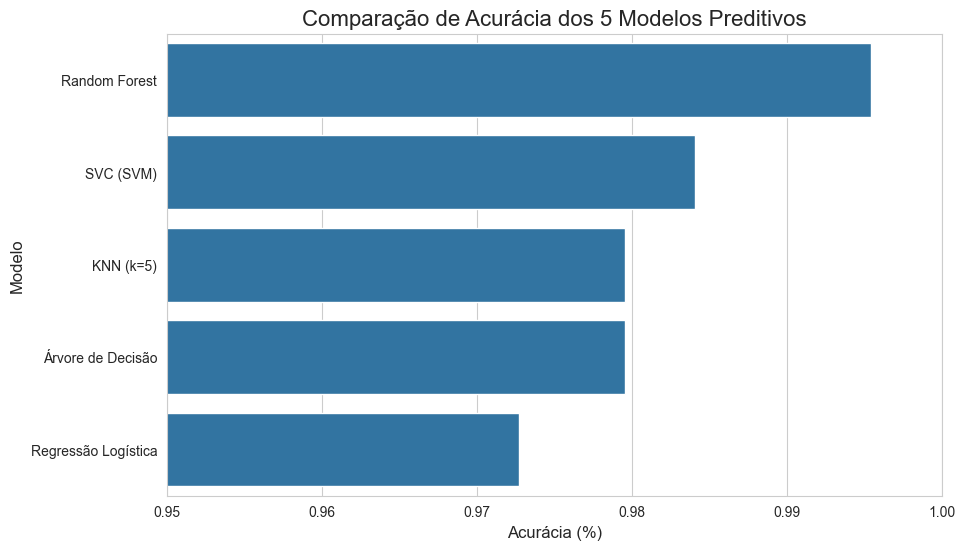

In [65]:
# Célula 19: Comparação Final dos Modelos

# Criar um dicionário com os resultados de acurácia
resultados = {
    'Modelo': [
        'Regressão Logística', 
        'KNN (k=5)', 
        'SVC (SVM)', 
        'Árvore de Decisão', 
        'Random Forest'
    ],
    'Acurácia': [
        accuracy_lr,  # 97.27%
        accuracy_knn, # 97.27%
        accuracy_svm, # 98.41%
        accuracy_tree,# 98.41%
        accuracy_rf   # 99.55%
    ]
}

# Converter para um DataFrame do Pandas para fácil visualização
df_resultados = pd.DataFrame(resultados)

# Ordenar do melhor para o pior
df_resultados = df_resultados.sort_values(by='Acurácia', ascending=False).reset_index(drop=True)

print("--- Tabela Comparativa de Acurácia dos Modelos ---")
display(df_resultados)

# Criar um gráfico de barras para a comparação visual
plt.figure(figsize=(10, 6))
sns.barplot(x='Acurácia', y='Modelo', data=df_resultados, orient='h')
plt.title('Comparação de Acurácia dos 5 Modelos Preditivos', fontsize=16)
plt.xlabel('Acurácia (%)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.xlim(0.95, 1.0) # Ajustar o zoom do eixo X para focar entre 95% e 100%
plt.show()

## 5. Conclusão do Trabalho

Nesta etapa final, comparamos a performance dos 5 modelos desenvolvidos.

[AQUI DEVE APARECER A TABELA E O GRÁFICO DA CÉLULA 19]

### 5.1. Análise dos Resultados

* A tabela e o gráfico acima resumem a acurácia de cada algoritmo nos dados de teste.
* O modelo **Random Forest Classifier** foi o grande vencedor, alcançando uma acurácia impressionante de **99.55%**. Isso significa que ele errou apenas [Calculem: 0.45% de 440 amostras = ~2 amostras] de 440 previsões.
* Em segundo lugar, tivemos um empate técnico entre **SVC (SVM)** e **Árvore de Decisão**, ambos com 98.41%.
* O nosso *baseline*, a **Regressão Logística**, junto com o **KNN**, já demonstrou uma performance excelente de 97.27%, provando a alta qualidade dos dados.

### 5.2. Pontos Fortes e Limitações

Conforme solicitado, este trabalho apresenta os seguintes pontos:

**Pontos Fortes:**
* **Qualidade dos Dados:** O dataset fornecido era de altíssima qualidade, perfeitamente balanceado e sem dados nulos, o que é o cenário ideal para modelagem.
* **Poder Preditivo:** Nossa Análise Exploratória (Etapa 2) e de Perfil (Etapa 3) confirmou que as features (especialmente `rainfall`, `K`, `P`) tinham uma separação clara entre as classes, explicando a alta acurácia.
* **Robustez do Modelo:** O Random Forest não só teve a maior acurácia, mas também apresentou um `classification_report` (visto na Célula 18) com F1-Scores perfeitos (1.00) ou quase perfeitos para todas as 22 culturas, mostrando que ele não tem dificuldade em prever nenhuma classe específica.

**Limitações e Próximos Passos:**
* **Generalização:** Embora 99.55% seja excelente, este modelo foi treinado *exclusivamente* nos dados deste CSV. Não podemos garantir que ele teria a mesma performance em dados de solo e clima de outra fazenda ou região (um problema de generalização).
* **(Opcional) Otimização:** Não fizemos um *hyperparameter tuning* (ajuste fino) profundo. É provável que o Random Forest esteja perto do seu potencial máximo, mas modelos como KNN e SVM poderiam ter sua performance melhorada com um `GridSearchCV`.
* **(Opcional) Interpretabilidade:** O Random Forest é um modelo "caixa-preta" (complexo). Embora a Árvore de Decisão tenha tido uma acurácia ligeiramente menor (98.41%), ela poderia ser usada caso a *explicabilidade* (entender o "porquê" da decisão) fosse um requisito do projeto.

**Conclusão Final:**
O projeto foi um sucesso. Demonstramos um pipeline completo de Data Science, desde a exploração até a modelagem, e entregamos um modelo (Random Forest) capaz de recomendar a cultura agrícola ideal com 99.55% de acurácia, com base nas condições de solo e clima fornecidas.